In [9]:
f = open("weight-height.txt", "r")
lines = f.readlines()
male=[]
male_weight=[]
male_height=[]
female=[]
female_weight=[]
female_height=[]

for x in range(1,5001):
    male_list = lines[x].split()
    male_weight.append(male_list[1])
    male_height.append(male_list[2])
    male.append([male_list[1],male_list[2]])

    
for x in range(5002,10001):
    female_list = lines[x].split()
    female_weight.append(female_list[1])
    female_height.append(female_list[2])
    female.append([female_list[1],female_list[2]])


In [20]:
from sklearn.cluster import KMeans
import matplotlib.pyplot  as plt
import seaborn as sns


model = KMeans(n_clusters=3,algorithm='auto')
model.fit(male)
predict = pd.DataFrame(model.predict(male))
predict.columns=['predict']
predict['gender']="male"
predict['weight'] = male_weight
predict['height']=male_height

predict.to_csv('male.csv', index=False)

In [19]:
model = KMeans(n_clusters=3,algorithm='auto')
model.fit(female)
predict = pd.DataFrame(model.predict(female))
predict.columns=['predict']
predict['gender']="female"
predict['weight'] = female_weight
predict['height']=female_height

predict.to_csv('female.csv', index=False)

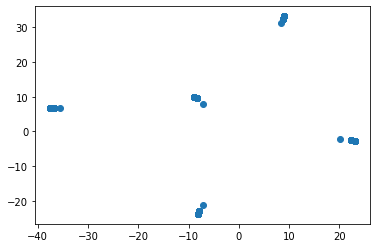

In [5]:
import numpy as np
from sklearn.manifold import TSNE

# 2개의 차원으로 축소
transformed = TSNE(n_components=2).fit_transform(predict)
transformed.shape

xs = transformed[:,0]
ys = transformed[:,1]
plt.scatter(xs,ys)  #라벨은 색상으로 분류됨

plt.show()